
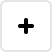
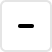
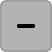
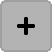
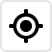
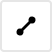
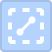
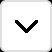
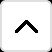
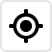
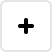
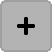
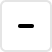
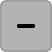
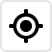
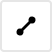
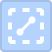
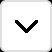
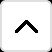
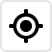

In [1]:
import PIL
import os
import pandas as pd
import numpy as np
import IPython.display as ip
import requests
from io import BytesIO

from lets_plot import *
LetsPlot.setup_html()

mpg = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv')
airquality_df = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/airquality.csv")
pie_df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot/refs/heads/master/docs/f-25a/data/gdp_forecast_2025_trillion_usd.csv", encoding ='utf-8')
markdown_df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
markdown_df.drop(columns=["Unnamed: 0"], inplace=True)

boat_response = requests.get('https://github.com/JetBrains/lets-plot-docs/raw/master/source/examples/cookbook/images/fisher_boat.png')
boat_raster = PIL.Image.open(BytesIO(boat_response.content))
boat = np.asarray(boat_raster)

def show(p, name, wo_save=False):
    if not wo_save:
        img = ggsave(p, name + ".bmp")
        out_dir = os.path.dirname(img)
        png_img = os.path.join(out_dir, name + '.png')
        PIL.Image.open(img).save(png_img)

    ip.display(ip.HTML("<h4>SVG</h4>"))
    p.show()

    ip.display(ip.HTML("<h4>ImageMagick</h4>"))
    
    if not wo_save:
        ip.display(ip.Image(png_img))
    return

# Basic plots


Unsupported attribute `fill-rule` in Path


Fontconfig warning: "/home/ikupriyanov/.fonts.conf", line 11: invalid attribute 'name'


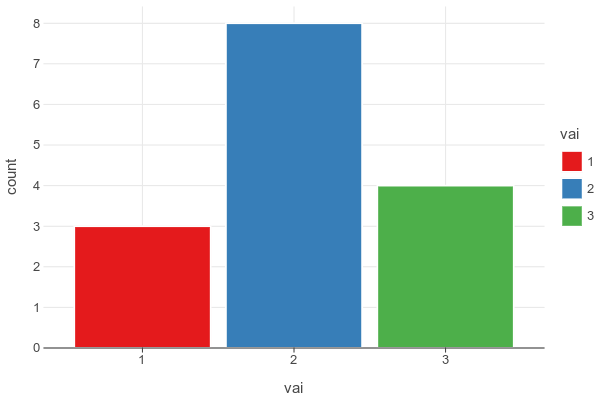

In [2]:
barplot_df = {
    'val': ['3', '1', '2', '3', '1', '3', '2', '1', '3', '2', '2', '2', '2', '2', '2'],
    'vai': [3, 1,2, 3, 1, 3, 2, 1, 3, 2, 2, 2, 2, 2, 2]
}
p = ggplot(barplot_df) + geom_bar(aes(x=as_discrete('vai'), fill=as_discrete('vai', levels=[1, 2, 3])))

show(p, "magick_barplot")

# Path


Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path


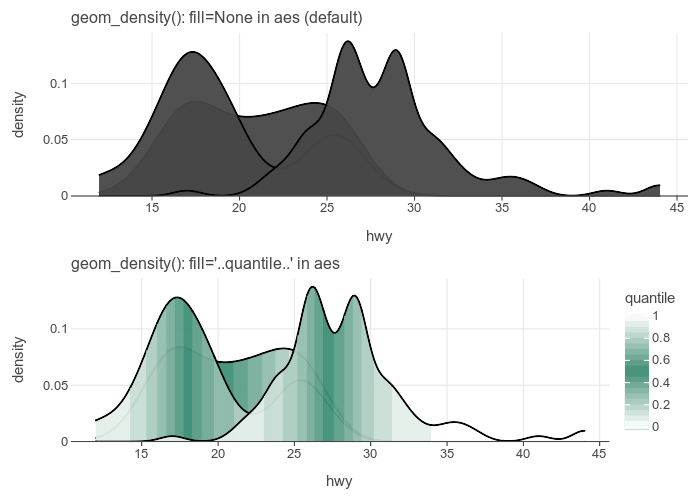

In [3]:
common_args = {'color': "black", 'alpha': .95}
quantiles = np.linspace(0, 1, 15)
fill_diverging = scale_fill_gradient2(low="white", mid="#3F8F77", high="white", midpoint=0.5)

p = ggplot(mpg, aes("hwy", group="drv"))
p1 = p + geom_density(**common_args) + \
    ggtitle("geom_density(): fill=None in aes (default)")
p2 = p + geom_density(aes(fill='..quantile..'), quantiles=quantiles, **common_args) + fill_diverging + \
    ggtitle("geom_density(): fill='..quantile..' in aes")
p = gggrid([p1, p2], ncol=1) + ggsize(700, 500)

show(p, "magick_path")

# Variadic Path


Unsupported attribute `fill-rule` in Path


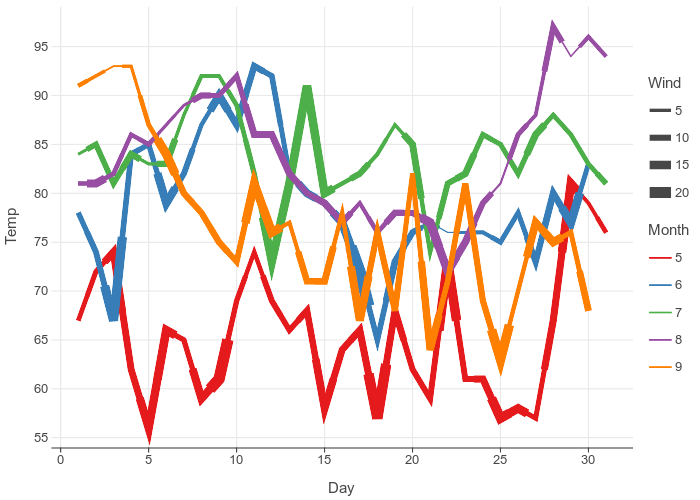

In [4]:
p = ggplot(airquality_df) \
    + geom_line(
        aes(
            x = 'Day', 
            y = 'Temp', 
            size = 'Wind', # <--- wind varies by day
            color = as_discrete('Month')
        )
    ) \
    + scale_size([0.5, 5.0]) \
    + ggsize(700, 500)

show(p, "magick_variadic_path")

# Fonts


Unsupported attribute `fill-rule` in Path


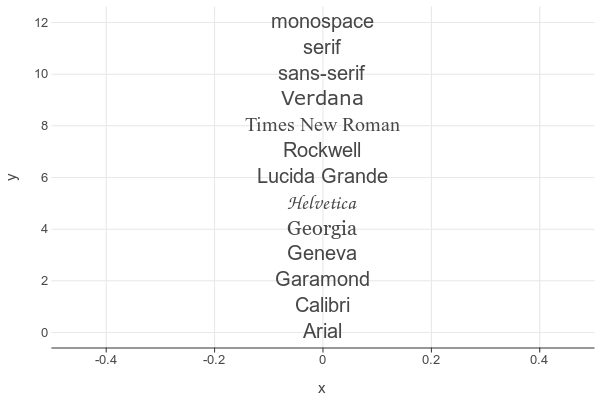

In [5]:
fonts = {
    "y": [ 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0 ],
    "label": [ "Arial", "Calibri", "Garamond", "Geneva", "Georgia", "Helvetica", "Lucida Grande", "Rockwell", "Times New Roman", "Verdana", "sans-serif", "serif", "monospace" ],
    "family": [ "Arial", "Calibri", "Garamond", "Geneva", "Georgia", "Helvetica", "Lucida Grande", "Rockwell", "Times New Roman", "Verdana", "sans-serif", "serif", "monospace" ]
}

p = ggplot(fonts, aes(y='y', label='label', family='family')) + geom_text(size=10)

show(p, "magick_fonts.bmp")

# Markdown


Unsupported attribute `fill-rule` in Path


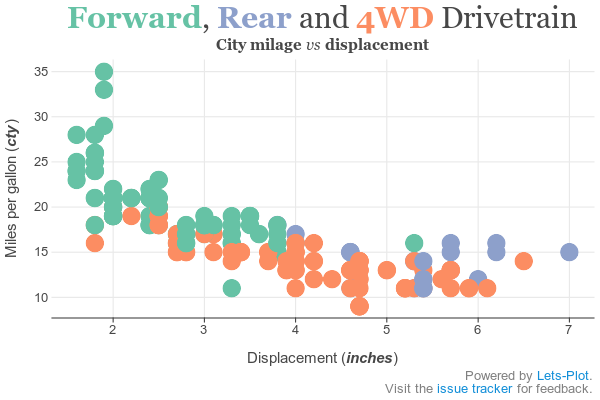

In [6]:
p = (ggplot(markdown_df) 
    + geom_point(aes(x='displ', y='cty', color='drv'), size=8) 
    + scale_color_manual(['#66c2a5', '#fc8d62', '#8da0cb'], guide='none') 

    # Enable Markdown in all titles
    + theme(title=element_markdown()) 

    # Adjust style of title and subtitle
    + theme(plot_title=element_text(size=30, family='Georgia', hjust=0.5), 
            plot_subtitle=element_text(family='Georgia', hjust=0.5)) 

    + labs(

        # Span styling, mixing style and emphasis
        title=
            """<span style="color:#66c2a5">**Forward**</span>, """
            """<span style="color:#8da0cb">**Rear**</span> and """
            """<span style="color:#fc8d62">**4WD**</span> Drivetrain""",

        # Simple emphasis
        subtitle='**City milage** *vs* **displacement**', 

        # multiline caption, multiline style span, links 
        caption="<span style='color:grey'>"
                "Powered by <a href='https://lets-plot.org'>Lets-Plot</a>.  \n"
                "Visit the <a href='https://github.com/jetbrains/lets-plot/issues'>issue tracker</a> for feedback." 
                "</span>",

        # Axis titles
        x='Displacement (***inches***)',
        y='Miles per gallon (***cty***)'
    )
)

show(p, "magick_markdown")

# Pie


Unsupported attribute `fill-rule` in Path


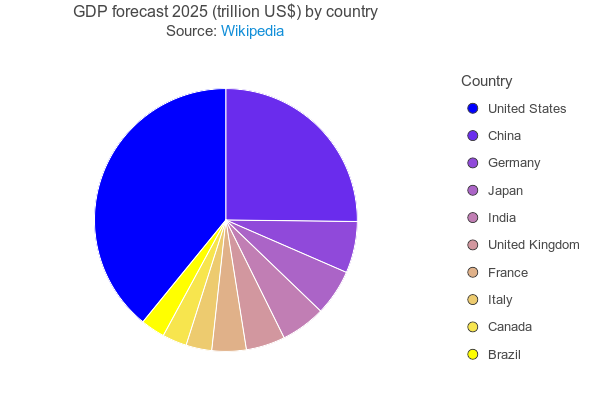

In [7]:
p = ggplot(pie_df, aes(fill='Country', slice='GDP_2025_Trillion_USD')) \
    + geom_pie(size=.6, size_unit='x', stat='identity') \
    + ggtitle('GDP forecast 2025 (trillion US$) by country', 
              subtitle='Source: <a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)">Wikipedia</a>') \
    + scale_fill_gradient(low="blue", high="yellow") \
    + theme_void() + theme(plot_title=element_text(hjust=0.5), plot_subtitle=element_text(hjust=0.5))

show(p, "magick_pie")

# Power degree


Unsupported attribute `fill-rule` in Path


<>:4: SyntaxWarning: invalid escape sequence '\('
<>:4: SyntaxWarning: invalid escape sequence '\('
/tmp/ipykernel_2418148/2621143040.py:4: SyntaxWarning: invalid escape sequence '\('
  ggtitle("Graph of the \( y = x^3 - 100 x \)") + \


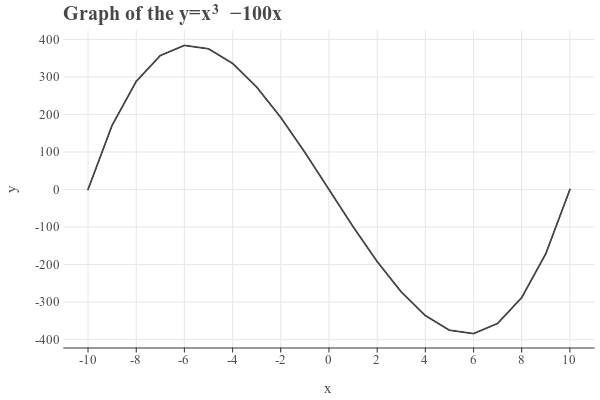

In [8]:
power_df = {'x': list(range(-10, 11))}
p = ggplot() + \
    geom_function(aes(x='x'), data=power_df, fun=lambda x: x**3 - 100 * x) + \
    ggtitle("Graph of the \( y = x^3 - 100 x \)") + \
    theme(text=element_text(family="Times New Roman"), \
          plot_title=element_text(size=20, face='bold'))

show(p, "magick_power")

# Polar plot


Unsupported attribute `fill-rule` in Path


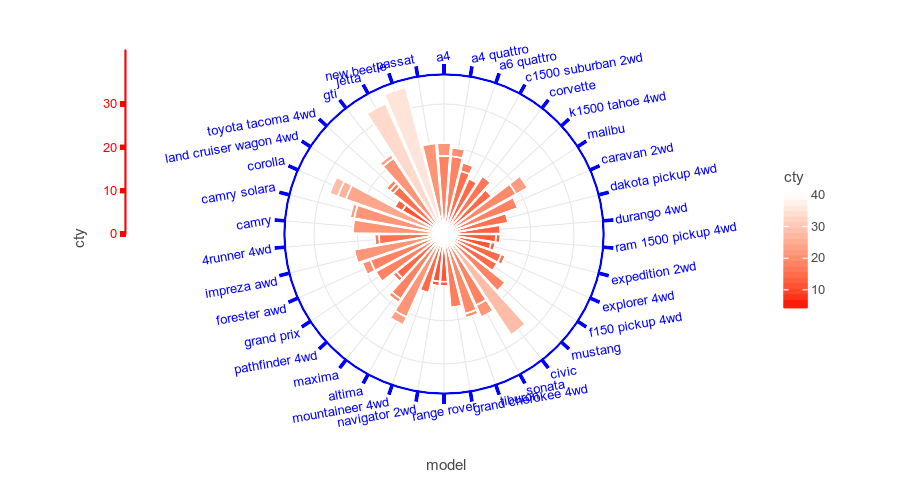

In [9]:
p = ggplot(mpg) \
    + geom_bar(aes(x='model', y='cty', fill='cty'), stat='identity', position='dodge') \
    + scale_fill_gradient(low='red', high='white', limits=(5,40)) \
    + theme(
        axis_line_y=element_line(color='red', size=2),
        axis_line_x=element_line(color='blue', size=2),
        axis_ticks_length_y=5,
        axis_ticks_length_x=10,
        axis_ticks_y=element_line(size=5, color='red'), 
        axis_ticks_x=element_line(size=3, color='blue'),
        axis_text_x=element_text(color='blue', angle=10),
        axis_text_y=element_text(color='red'),
        panel_inset=[20, 140, 30, 135]                      # New! Expand the panel to fit axis labels.
    ) \
    + ggsize(900, 500) \
    + coord_polar(transform_bkgr=False)                     # Keep the old school rectangular background.

ggsave(p, "magick_polar.svg")
show(p, "magick_polar")

# Curve


Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path


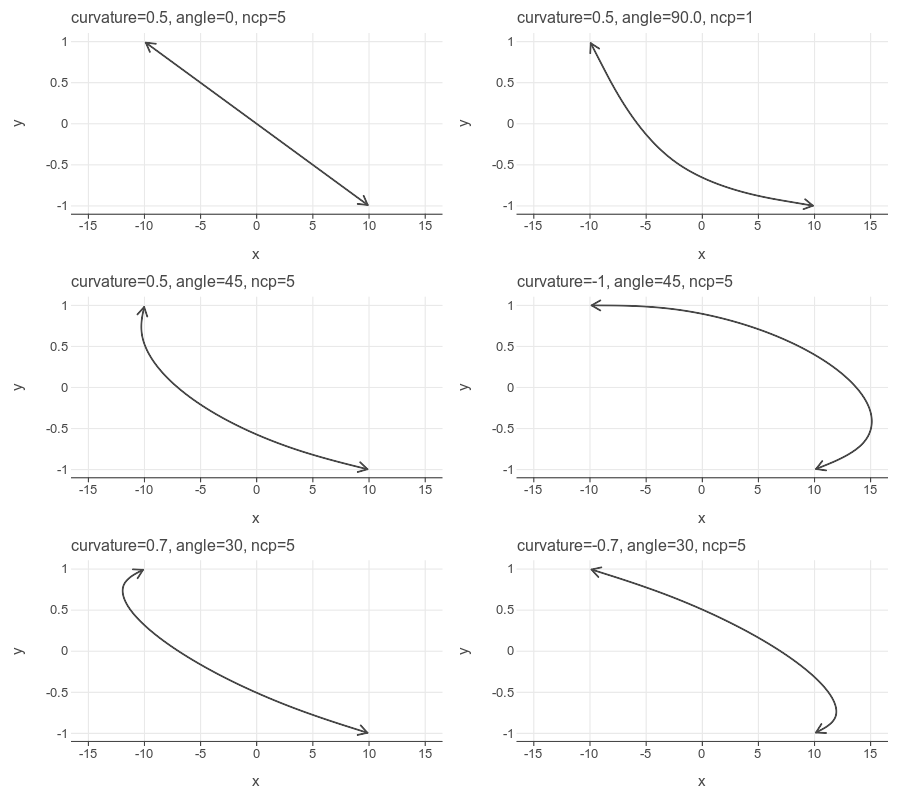

In [10]:
def curve_plot(curvature=0.5, angle=90.0, ncp=5):
    return ggplot() \
            + geom_curve(x=-10, y=1, xend=10, yend=-1, 
                         curvature=curvature, angle=angle, ncp=ncp,
                         arrow=arrow(ends='both')) \
            + ggtitle("curvature={0}, angle={1}, ncp={2}".format(curvature, angle, ncp)) \
            + xlim(-15,15)

p = gggrid([
    curve_plot(angle=0),
    curve_plot(ncp=1),
    curve_plot(angle=45),
    curve_plot(curvature=-1, angle=45),
    curve_plot(curvature=0.7, angle=30),
    curve_plot(curvature=-0.7, angle=30),
], ncol=2)

show(p, "magick_curve")

# Clip Path


Unsupported attribute `fill-rule` in Path


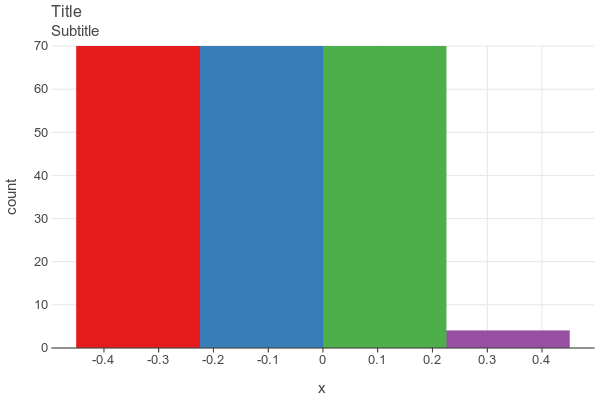

In [11]:
p = ggplot(mpg) \
        + geom_bar(aes(fill=as_discrete('cyl')), size=0, position='dodge', show_legend=False) + coord_cartesian(ylim=[0, 70]) + ggtitle("Title", "Subtitle")

show(p, "magick_clip")


Unsupported attribute `fill-rule` in Path


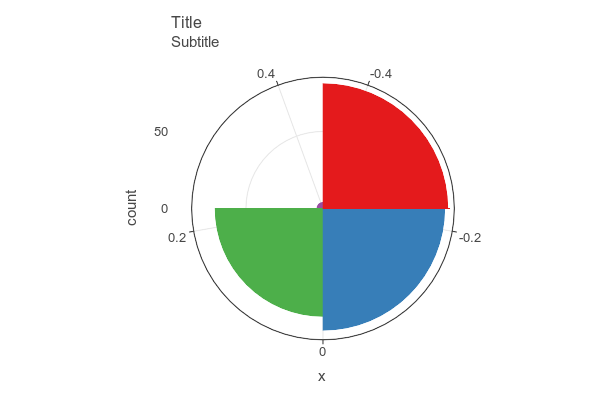

In [12]:
p = ggplot(mpg) \
    + geom_bar(aes(fill=as_discrete('cyl')), size=0, position='dodge', show_legend=False) + coord_cartesian(ylim=[0, 70]) + ggtitle("Title", "Subtitle") \
    + coord_polar()

show(p, "magick_clip_polar")

# imshow

## greyscale


Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels


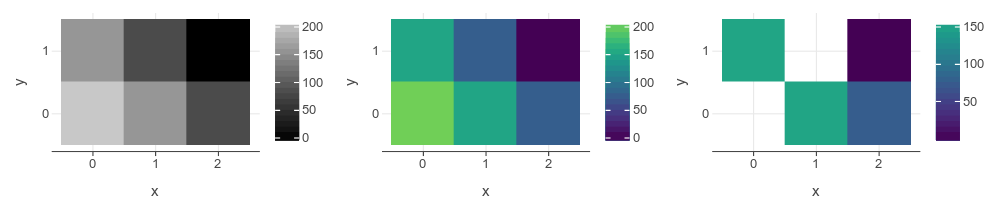

In [13]:
arr = np.array([[150,   75,   0],
               [  200, 150, 75]])
arr_nans = np.array([
    [150, np.nan ,0],
    [np.nan, 150 ,75]
    ])

p = gggrid([
    ggplot() + geom_imshow(arr, norm=False),
    ggplot() + geom_imshow(arr, cmap="viridis", norm=False),
    ggplot() + geom_imshow(arr_nans, cmap="viridis", norm=False),
], ncol=3) + ggsize(1000, 210)
    
show(p, "magick_imshow_greyscale")

## rgb


Unsupported attribute `fill-rule` in Path
MagickCanvas: Successfully imported image pixels


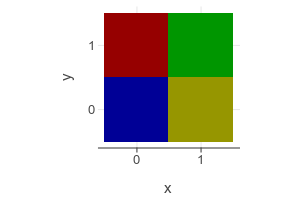

In [14]:
# An 2x2 pix image by default has extent [-0.5, 1.5, -0.5, 1.5]
arr = np.array([
            [[150, 0, 0, 255], [0, 150, 0, 255]],
            [[0, 0, 150, 255], [150, 150, 0, 255]]
        ])

p = ggplot() + geom_imshow(arr) + ggsize(300, 200)
show(p, "magick_imshow")


Unsupported attribute `fill-rule` in Path
MagickCanvas: Successfully imported image pixels



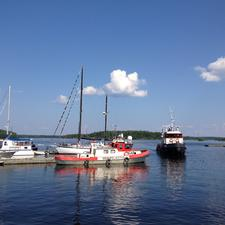

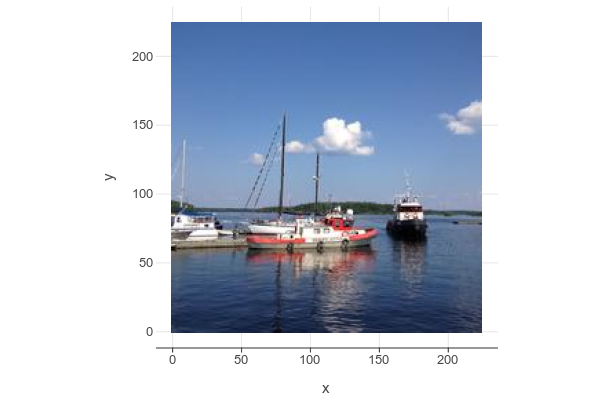

In [15]:
p = ggplot() + geom_imshow(image_data=boat)
show(p, "magick_boat")


Unsupported attribute `fill-rule` in Path
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels



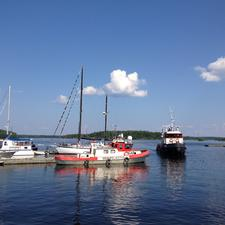
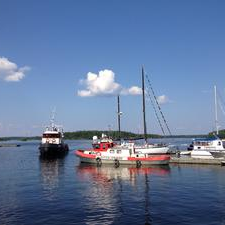
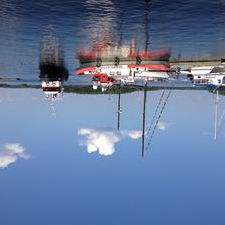
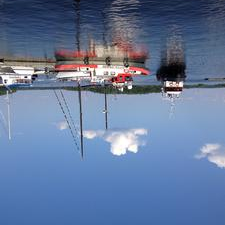

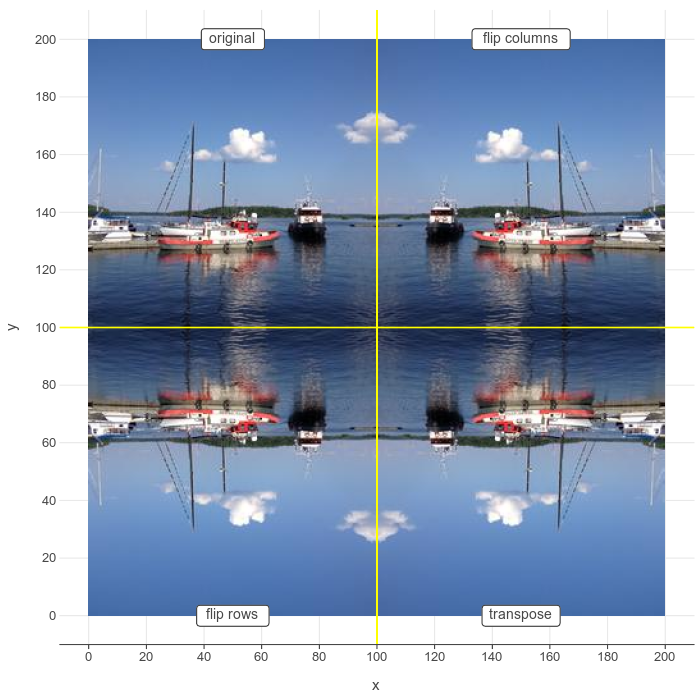

In [16]:
dim = 100

ext_base = [0, dim, 0, dim]
ext_flip_x = [dim, 0, 0, dim]
ext_flip_y = [dim, 0, dim, 0]
ext_transpose = [0, dim, dim, 0]

label_data = dict(
    x = [50, 150, 50, 150],
    y = [200, 200, 0, 0],
    label = ["original", "flip columns", "flip rows", "transpose"]
)

p = (ggplot() + 
     geom_imshow(boat, extent=[v + dim if i in (2, 3) else v for i, v in enumerate(ext_base)]) + 
     geom_imshow(boat, extent=[v + dim for v in ext_flip_x]) + 
     geom_imshow(boat, extent=[v + dim if i in (0, 1) else v for i, v in enumerate(ext_flip_y)]) + 
     geom_imshow(boat, extent=ext_transpose) + 
     geom_hline(yintercept=100, color="yellow", tooltips="none") + 
     geom_vline(xintercept=100, color="yellow", tooltips="none") + 
     geom_label(aes("x", "y", label="label"), data=label_data) +
     ggsize(700, 700)
)

show(p, "magick_boat_extent")

# image_matrix

In [17]:
from lets_plot.bistro.im import image_matrix


Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels



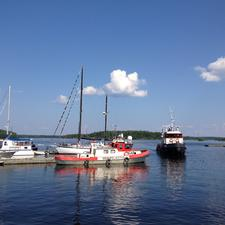
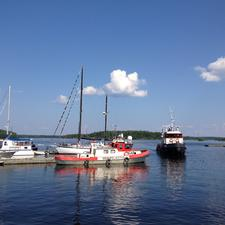
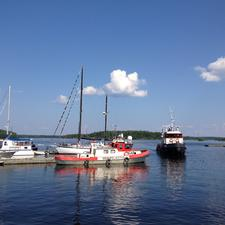
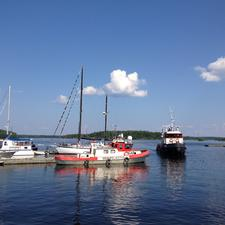
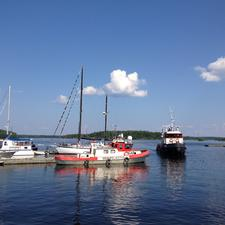
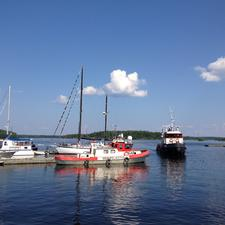

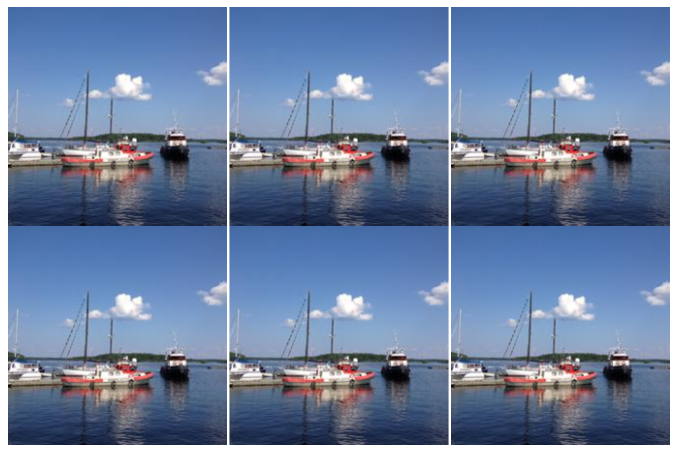

In [18]:
M = 2  # rows
N = 3  # columns
X = np.empty([M, N], dtype=object)
X.fill(boat)
p = image_matrix(X)
show(p, "image_matrix")


Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels



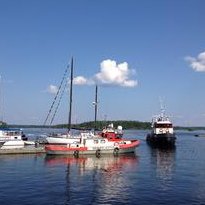
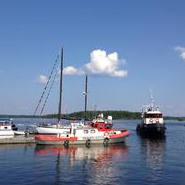
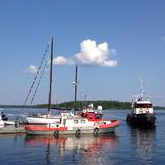
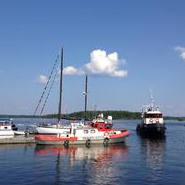
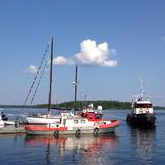
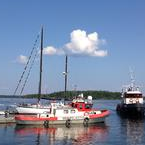

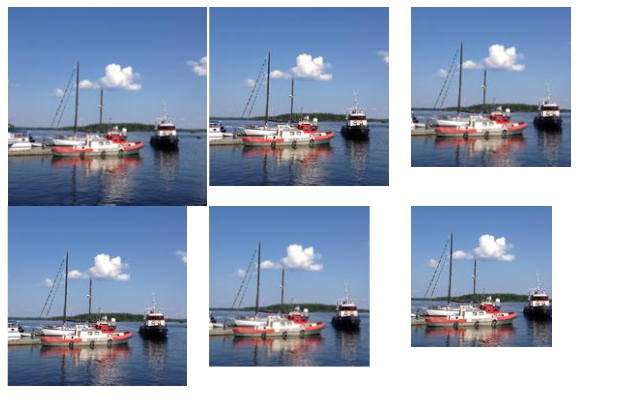

In [19]:
X1 = np.empty([M, N], dtype=object)
for row in range(M):
    for col in range(N):
        v = (row + col + 1) * 10
        X1[row][col] = boat[v:-v,v:-v,:]

p = image_matrix(X1)
show(p, "magick_image_matrix_sized")


Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels



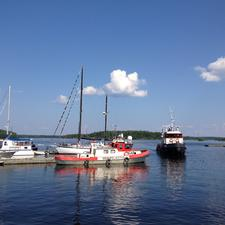
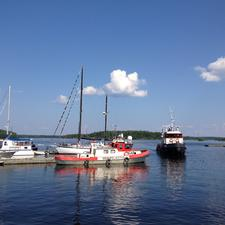
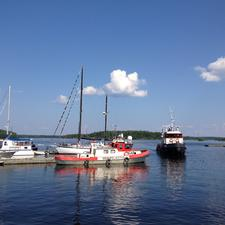
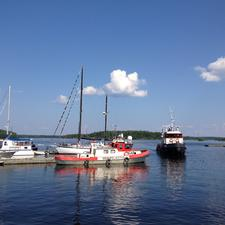
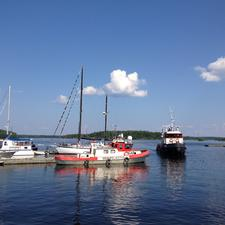
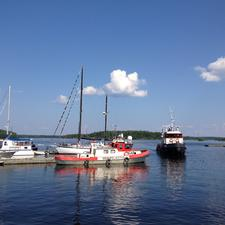

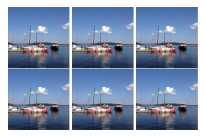

In [20]:
p = image_matrix(X, scale=.3)
show(p, "magick_image_matrix_scaled")

## greyscale

In [21]:
img_gs = boat[:,:,0]

def _degrade(grayscale_img:np.ndarray, coef:float):
    vmin = grayscale_img.min()
    vmax = grayscale_img.max()
    middle = vmin + (vmax - vmin) / 2

    rows, cols = grayscale_img.shape
    for row in range(rows):
        for col in range(cols):
            v = float(grayscale_img[row][col])
            v_new = middle + (v - middle) * coef
            grayscale_img[row][col] = int(v_new)

X2 = np.empty([M, N], dtype=object)
img_copy = img_gs.copy()
for row in range(M):
    for col in range(N):
        X2[row][col] = img_copy
        img_copy = img_copy.copy()
        _degrade(img_copy, coef=.7)
        print("[{}, {}] data range: [{}-{}]".format(row, col, img_copy.min(), img_copy.max()))


[0, 0] data range: [38-216]
[0, 1] data range: [64-189]
[0, 2] data range: [82-170]
[1, 0] data range: [95-156]
[1, 1] data range: [104-146]
[1, 2] data range: [110-139]



Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels



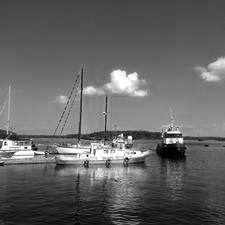
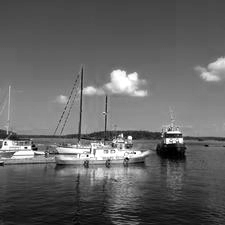
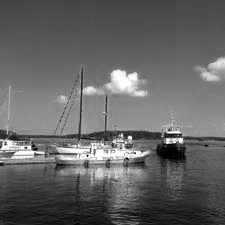
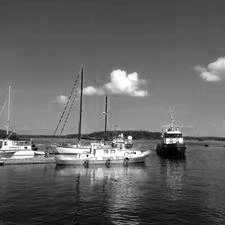
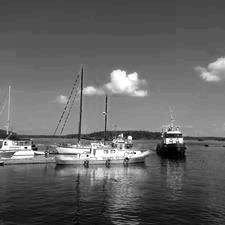
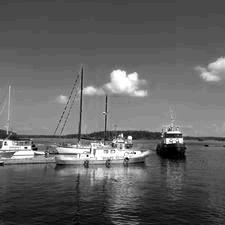

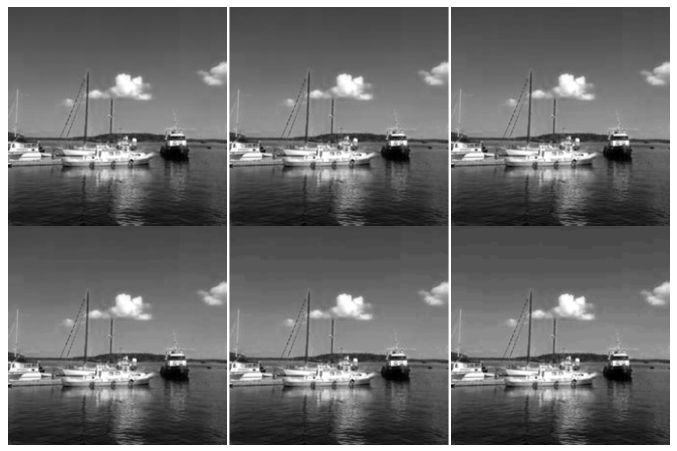

In [22]:
p = image_matrix(X2)
show(p, "magick_image_matrix_greyscale")


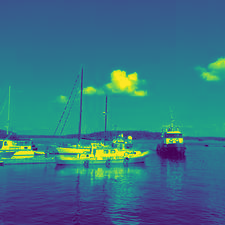

In [23]:
ggplot() + geom_imshow(X2[0][0], cmap="viridis")


Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
Unsupported attribute `fill-rule` in Path
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels
MagickCanvas: Successfully imported image pixels



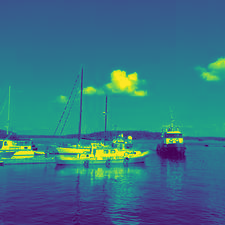
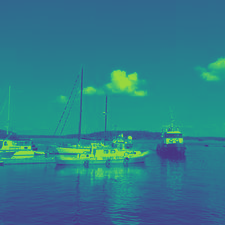
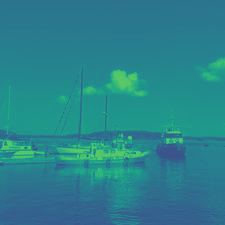
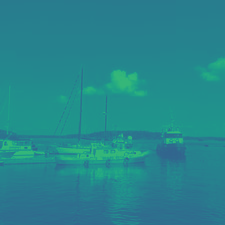
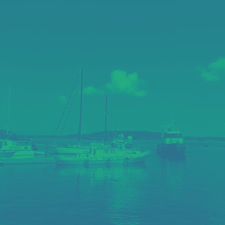
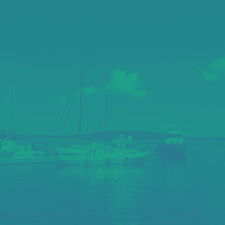

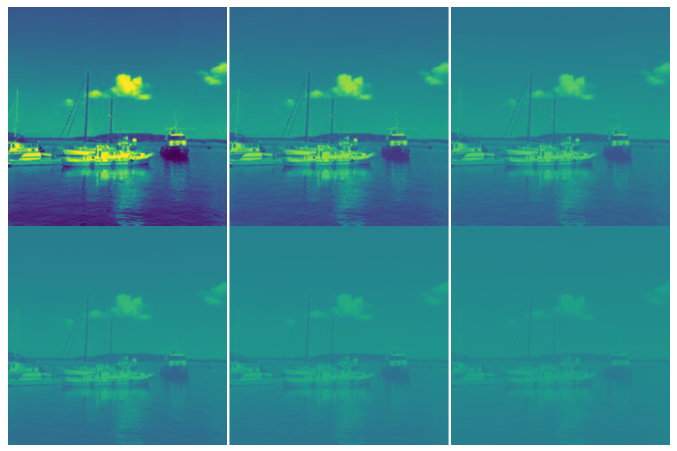

In [24]:
p = image_matrix(X2, cmap="viridis", norm=False)
show(p, "magick_image_matrix_cmap")

# Performance

## line


Unsupported attribute `fill-rule` in Path


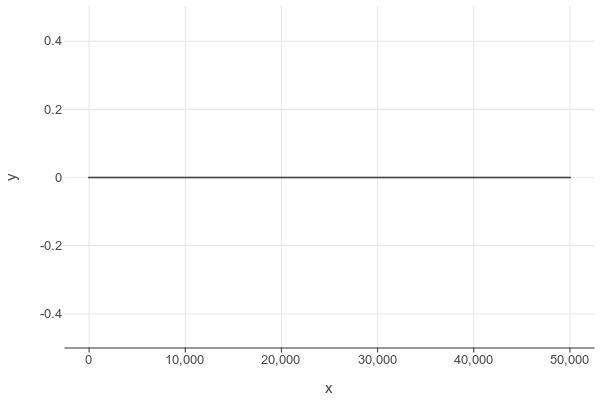

In [25]:
n = 50_000
x = list(range(n))
y = [0]*n
p = ggplot({'x': x, 'y': y}) + geom_line(aes(x='x', y='y'))
show(p, "magick_perf_line")

## point


Unsupported attribute `fill-rule` in Path


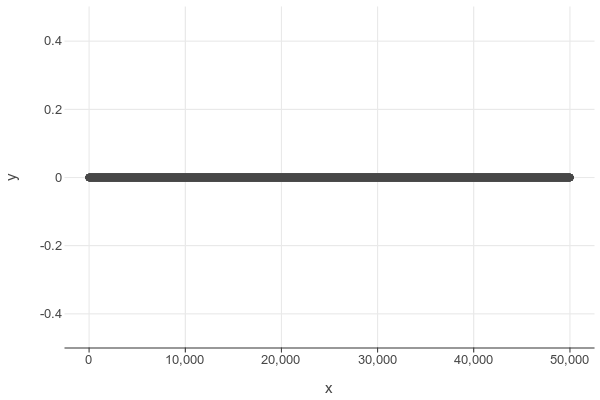

In [26]:
n = 50_000
x = list(range(n))
y = [0]*n
p = ggplot({'x': x, 'y': y}) + geom_point(aes(x='x', y='y'))
p

show(p, "magick_perf_point")